# Processing of tE142, August 2021


# reads demultiplexing

## bcl2fastq

totalReads = 445064999
undetermined = 106576722 (23.94%)


In [24]:
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn as sns

In [25]:
# plot raw and pre-processed reads with FASTP
data = pandas.read_csv("data/summary_fastp.txt", delimiter='\t')
data['clean'] = data['clean'] / 1e6
ax = sns.barplot(x="sample", y="clean", data=data)
ax.set_xticklabels(labels=data["sample"], rotation=90)
ax.set_ylabel("# sequenced reads [millions]")
ax.set_title("pre-processed reads are proportional to cDNA concentration")

Text(0.5, 1.0, 'pre-processed reads are proportional to cDNA concentration')

In [16]:
# plot alignment seed optimization
data = pandas.read_csv("data/summary_bwtparams.txt", delimiter=' ')
ax = sns.lineplot(data=data, x="seed", y="mismatch.0", markers=True)
ax.set_xticks(data["seed"])
ax.set_ylabel("alignment rate [%]")


Text(0, 0.5, 'alignment rate [%]')

Text(0.5, 1.0, 'Bowtie2 local alignment seed=15')

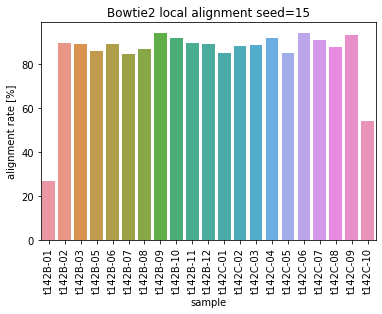

In [17]:
# plot alignment rate
data = pandas.read_csv("data/summary_bwt2.txt", delimiter='\t')
ax = sns.barplot(x="sample", y="rate", data=data)
ax.set_xticklabels(labels=data["sample"], rotation=90)
ax.set_ylabel("alignment rate [%]")
ax.set_title("Bowtie2 local alignment seed=15")

/Users/tushevg/Desktop/tRNAs/venv/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 47.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'summary RNA types')

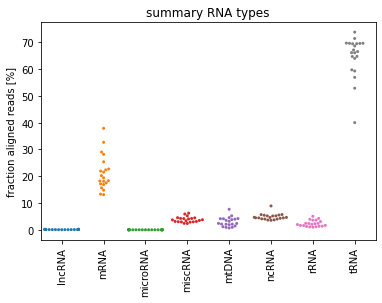

In [18]:
# plot RNA types
df = pandas.read_csv("data/summary_rnatypes.txt", delimiter='\t', index_col=0)
data = df.to_numpy()
values = numpy.zeros(data.shape, dtype=float)
i = 0
for row in data:
    nreads = sum(row)
    nrow = 100 * row / nreads
    values[i,:] = nrow
    i = i + 1
ndata = pandas.DataFrame(values, columns=df.columns)
ax = sns.swarmplot(data = ndata, size=3)
ax.set_xticklabels(labels=df.columns, rotation=90)
ax.set_ylabel('fraction aligned reads [%]')
ax.set_title('summary RNA types')

Text(0, 0.5, 'read length [nts]')

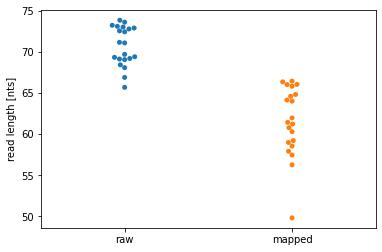

In [19]:
# plot read length
df = pandas.read_csv("data/summary_readlen.txt", delimiter='\t', index_col=0)
ax = sns.swarmplot(data = df)
ax.set_xticklabels(labels=["raw", "mapped"])
ax.set_ylabel("read length [nts]")

Text(0.5, 1.0, "tRNA coverage is biased for 3'end")

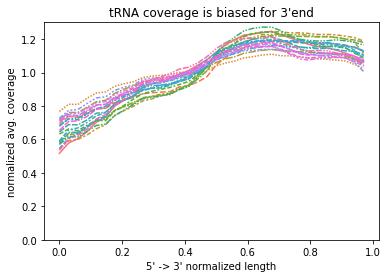

In [20]:
# plot depth along tRNAs
df = pandas.read_csv("data/summary_depth_norm.txt", delimiter='\t', index_col=0)
ax = sns.lineplot(data = df)
ax.set_ylim([0, 1.3])
ax.legend([],[], frameon=False)
ax.set_ylabel("normalized avg. coverage")
ax.set_xlabel("5' -> 3' normalized length")
ax.set_title("tRNA coverage is biased for 3'end")

(0.0, 100.0)

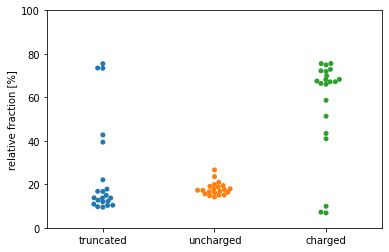

In [21]:
# plot charging state
df = pandas.read_csv("data/summary_charge_norm.txt", delimiter='\t', index_col=0)
ax = sns.swarmplot(data = df)
ax.set_ylabel("relative fraction [%]")
ax.set_ylim([0,100])

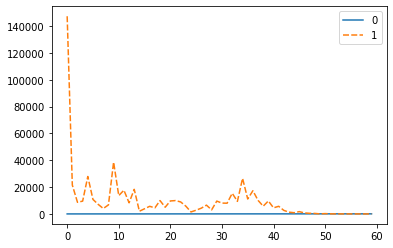

In [22]:
df = pandas.read_csv("data/list_pos.txt", delimiter='\t', header=None)
ax = sns.lineplot(data = df)

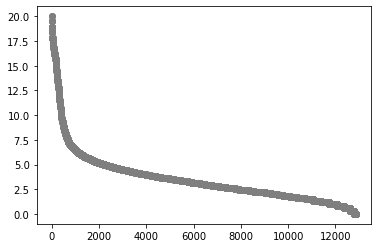

In [23]:
df = pandas.read_csv("data/tableCounts_tRNAs_15Sep2021.txt", delimiter='\t', header=0, index_col=0)
countsRaw = df[["t142B-09.raw", "t142B-11.raw", "t142C-06.raw", "t142C-08.raw"]]
countsCharged = df[["t142B-09.charged", "t142B-11.charged", "t142C-06.charged", "t142C-08.charged"]]
countsUncharged = df[["t142B-09.uncharged", "t142B-11.uncharged", "t142C-06.uncharged", "t142C-08.uncharged"]]
idxUse = countsRaw.all(axis='columns')
countsRaw = countsRaw[idxUse]
countsCharged = countsCharged[idxUse]
countsUncharged = countsUncharged[idxUse]

rank = numpy.log2(countsRaw.mean(axis='columns'))
rank = rank.sort_values(ascending=False)
x = numpy.array(range(len(rank))) + 1

plt.scatter(x, rank, c='#7f7f7f')